# Biological Shapes Exploration in Computional Arts

 
Add main picture (result)

## Title of Work
**By Name**


Write a one-sentence summary of what the project is.

## Introduction

Write a short introduction, a short paragraph, giving a bit more detail about what the project is.

## Concept and Background Research

Write about the concept behind the project, in other words the creative or theoretical inspiration. Include details about any background research you may have done (don’t forget to include references in the reference section). Consider writing about your work in relation to a creative, theoretical or computational tradition that you may be taking inspiration from, in other words think about how your work is situated in a particular making tradition. 

(Include any concept sketches here if you have any) 


### Types of Algorithm and Mathmatical shapes

- Straight skeletons
- Medial axis
- Medial Surface

### What is Medial Axis?

#### How It Works (Simplified)

Imagine a shape; the medial axis is like the spine or skeleton of that shape. If you imagine a fire starting at the boundary and spreading inwards at a constant speed, the medial axis is where the fire fronts meet. This skeletal structure (often a tree-like graph) captures the object's topology and thickness, making it a powerful tool for understanding and manipulating shapes digitally. 

#### The use of Medial Axis

1. Computer Graphics & Robotics (Path Planning):
    - Navigation Meshes: Used to create efficient pathfinding (Explicit Corridor Maps) for virtual characters in games and simulations, allowing smooth, collision-free movement in complex environments like buildings or stadiums.
    - Motion Planning: Helps robots navigate by defining drivable corridors within complex spaces.
2. Computer Vision & Image Analysis:
    - Object Recognition: Provides a stable, low-dimensional representation of shapes, aiding in recognizing objects regardless of viewpoint or minor distortions.
    - Shape Analysis: Extracts significant features, useful for recognizing patterns and understanding object structure.
3. Engineering & Manufacturing:
    - CAD/CAE (Computer-Aided Design/Engineering): Generates efficient mesh models for finite element analysis (FEA) by simplifying complex geometries.
    - Reverse Engineering: Helps characterize shapes from point clouds (like LiDAR scans) to reconstruct surfaces, as shown in this ScienceDirect article.
4. Medical Imaging & Biology:
    - Shape Analysis: Models biological structures like the heart's left ventricular wall, helping analyze deformations and diseases.
    - Feature Extraction: Identifies skeletal features in medical scans for analysis.
5. Manufacturing (Tool Path Planning): Determines optimal paths for cutting tools in CNC (Computer Numerical Control) machining, as mentioned in this MSP article. 


### Thames Water

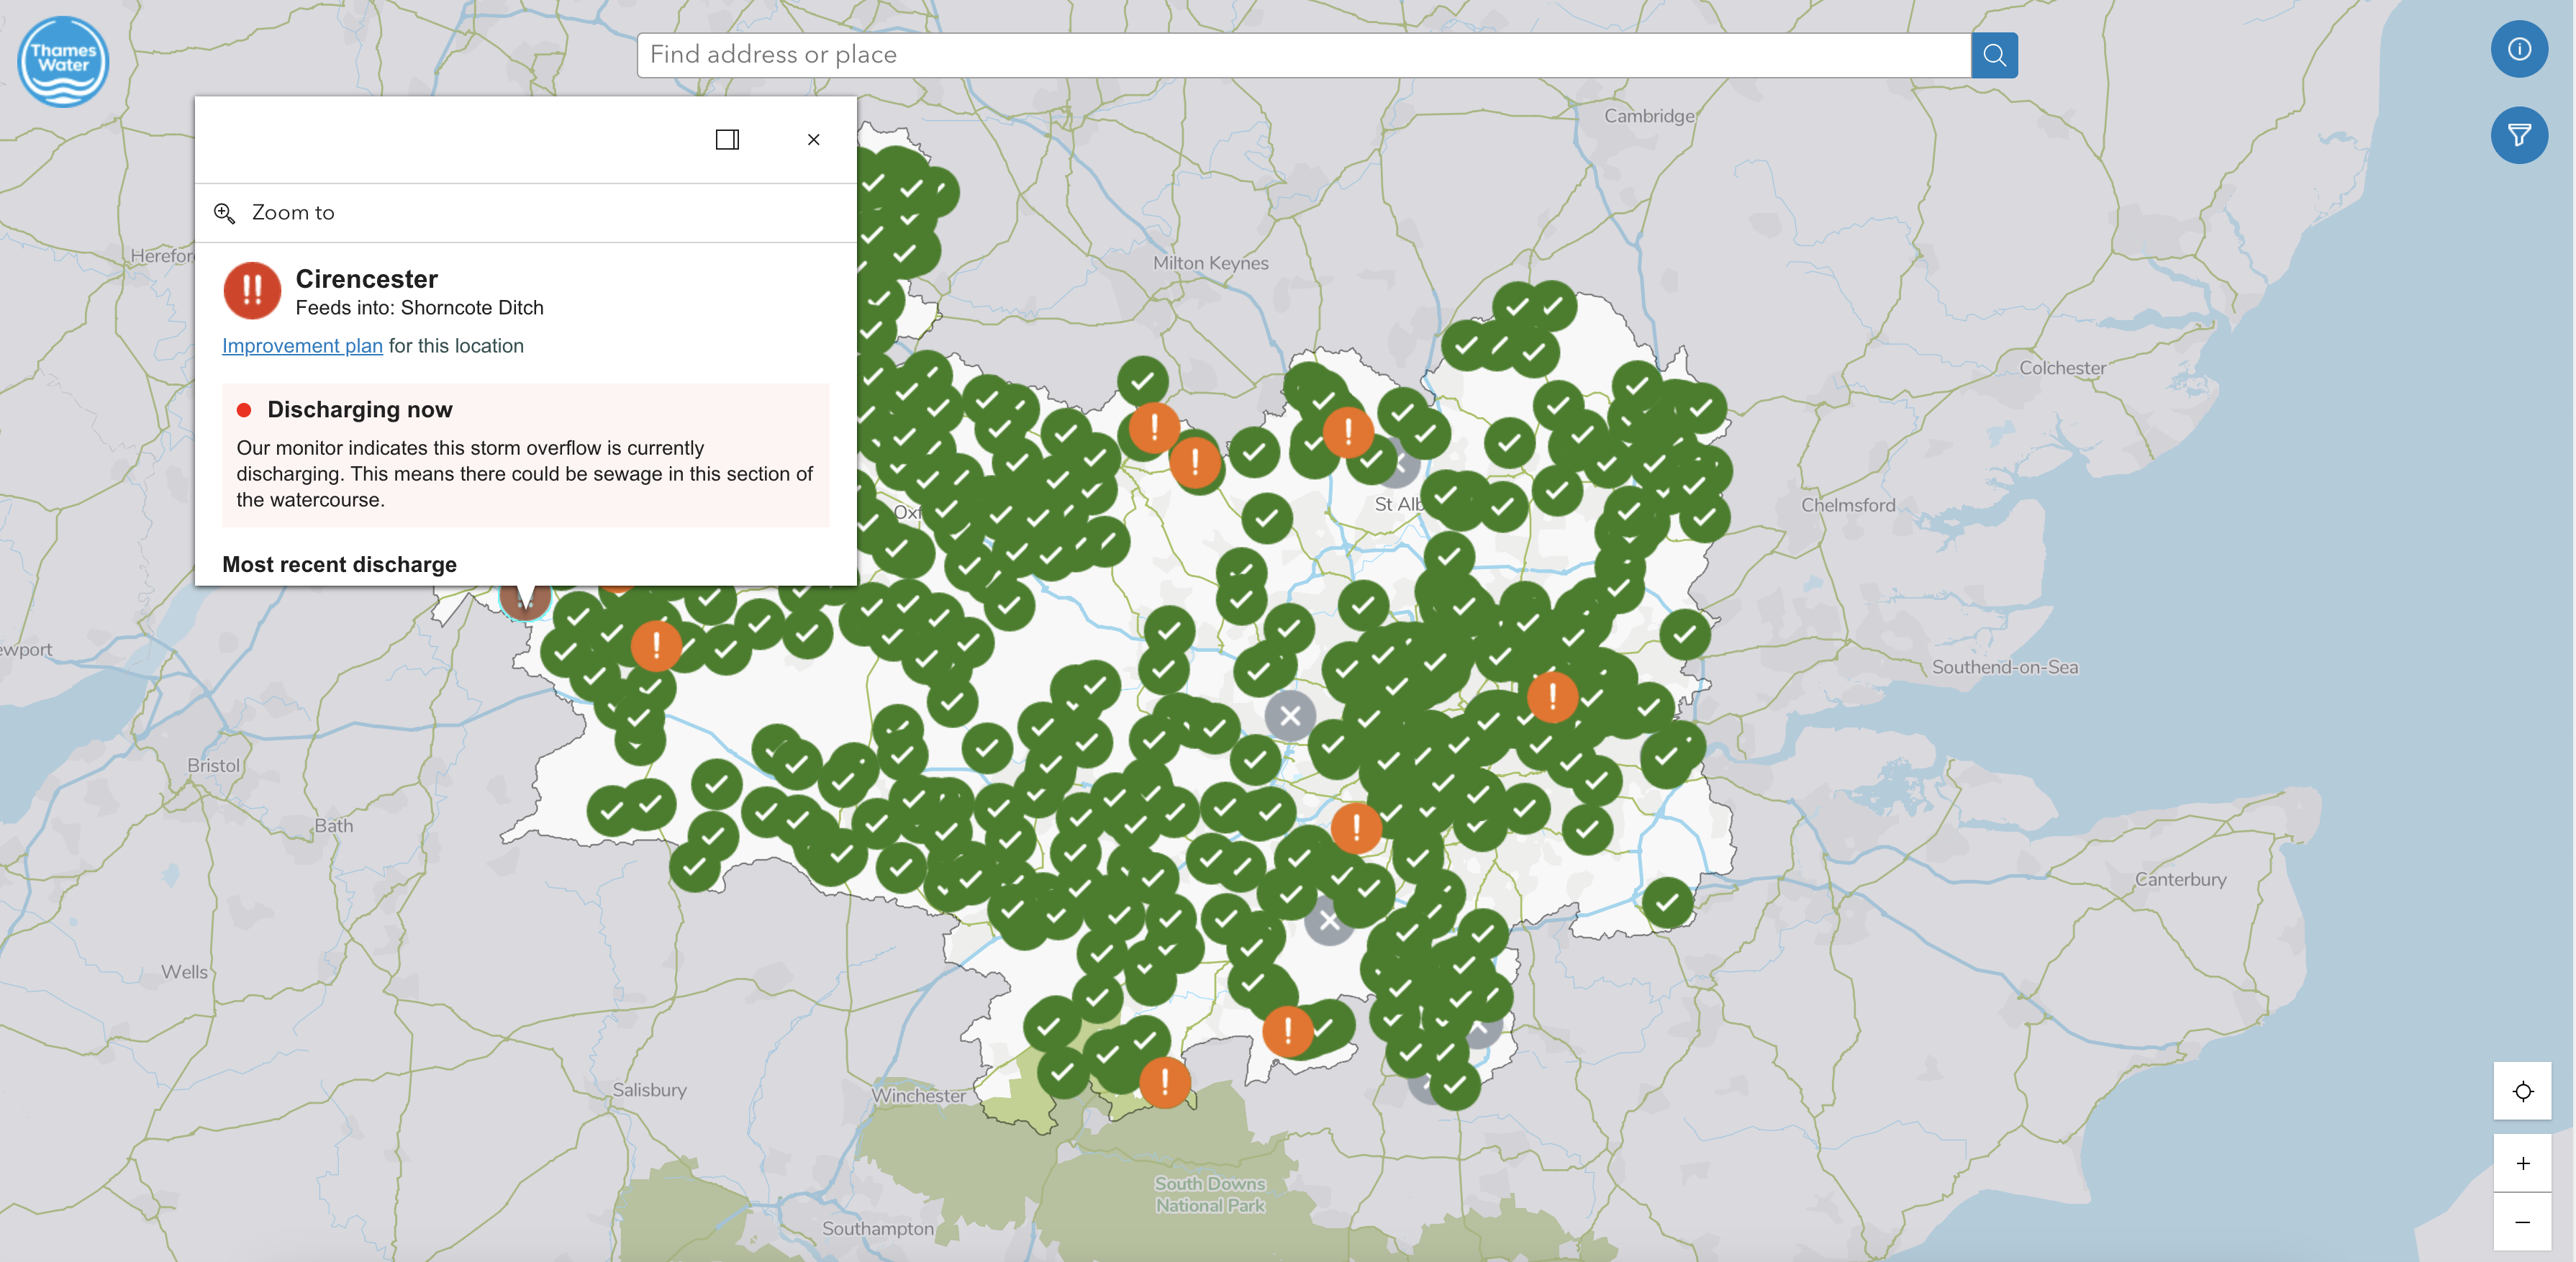 
##### Figure 1. Screen-capture image of [Thames Water website](https://www.thameswater.co.uk/edm-map#storm-discharge-map) showing real-time discharge data.  

## Technical Implementation

I wanted to start by re-creating this image I found from one webpage (ScienceDirect, 2025). 

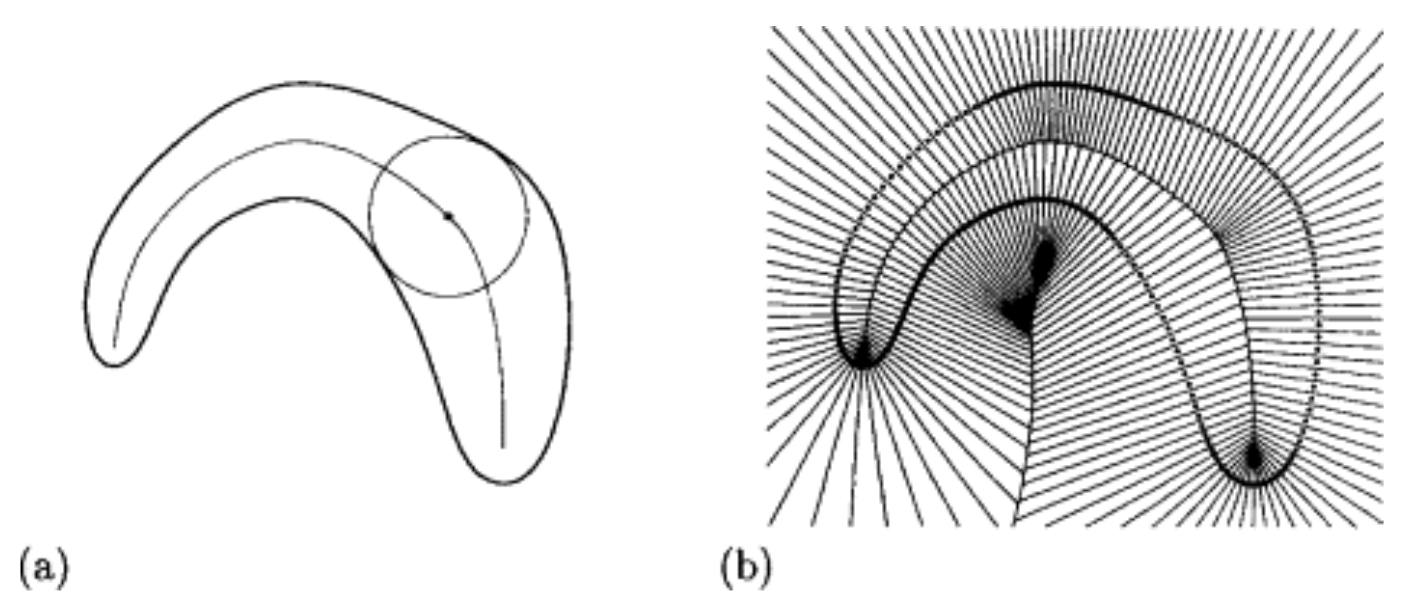

### Check where you are running python

I had a issue downloading modules in different environment. I practice myself to check whenever I run the codes.

In [384]:
import sys
print(sys.executable)
print(sys.version)


/Users/sohyunjun/miniforge3/envs/py5/bin/python
3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:46:25) [Clang 18.1.8 ]


### Main Code

This is the main part of code using py5canvas to makeing shopas with Medial Axis.

First, install modules.
```
conda install py5canvas numpy scipy shapely
```

In [385]:
# Import the py5canvas
from py5canvas import *

Accessed: 06-01-2026

Discharging:
- Cirencester
- Eydon

Discharged within 48 hours:
- West Ham Lane CSO
- Haslemere STW CSO
- Stanton Fitzwarren STW
- Fairford
- South Moreton
- Rowsham
- Watery Lane, Startops End

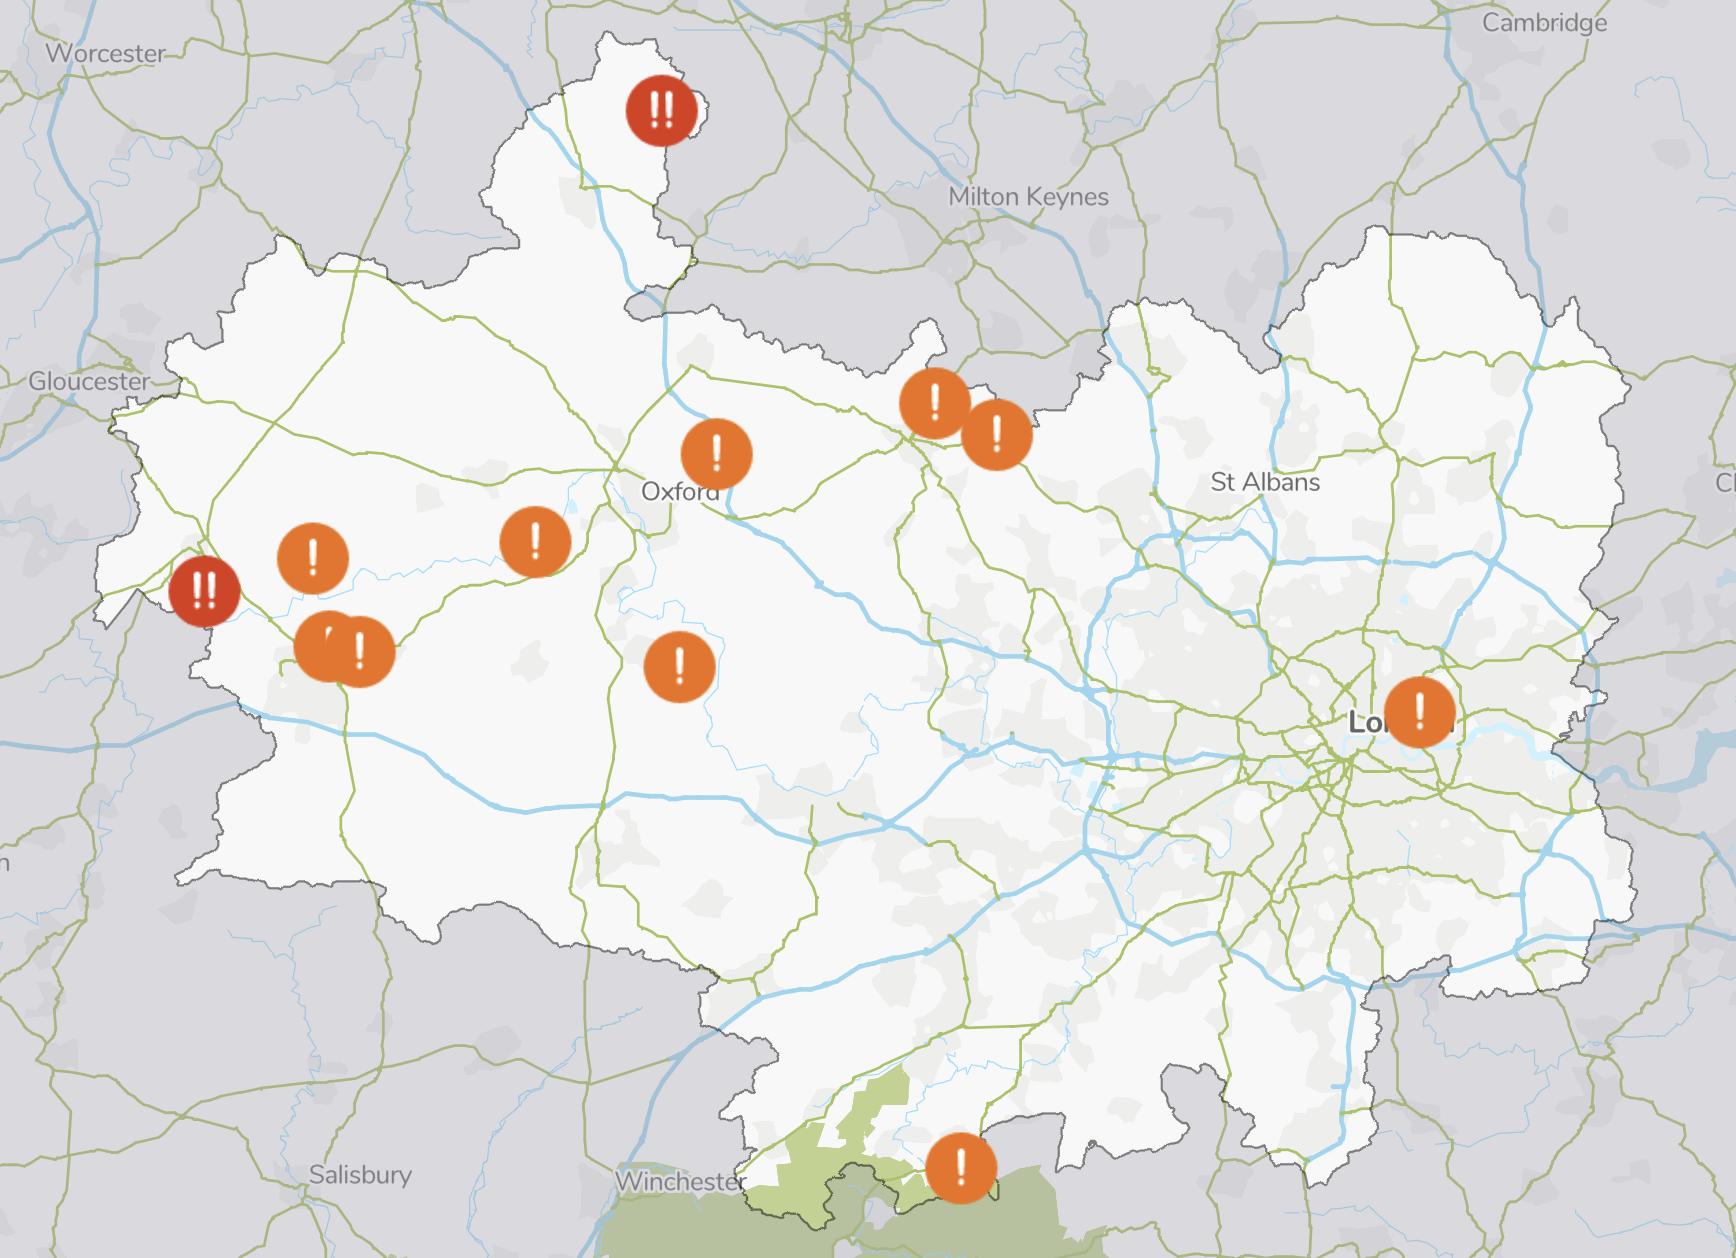

In [386]:
minX = 402500
maxX = 559170
minY = 132300
maxY = 252560

# Test with an example value: Cirencester 
coords = [
    (403580, 196790),  # Cirencester
    (454370, 250100),  # Eydon
    (539050, 183880),  # West Ham Lane CSO
    (417380, 190420),  # Stanton Fitzwarren STW
    (415170, 199920)   # Fairford
]

exampleX = 403580 
exampleY = 196790 

def map_value(val, rangeMin, rangeMax, screenMin=0, screenMax=600):
    # Clamp input values
    cv = max(rangeMin, min(val, rangeMax))

    # Normalise to 0–1
    nv = (cv - rangeMin) / (rangeMax - rangeMin)
    # print("between 0-1: " + str(nv))

    # # Flip Y for screen coordinates (origin at top-left)
    # ny = 1.0 - ny

    # Map to screen range
    mapped_val = screenMin + nv * (screenMax - screenMin)

    return mapped_val

# Test mapping function
for x, y in coords:
    mx = int(map_value(x, minX, maxX))
    my = int(map_value(y, minY, maxY))
    print("x: " + str(mx) + ", y: " + str(my))



x: 4, y: 321
x: 198, y: 587
x: 522, y: 257
x: 56, y: 289
x: 48, y: 337


In [387]:
# Import the Numpy
from scipy.interpolate import splprep, splev
import numpy as np

# Define dummy anchor points for closed curve

anchor_points = [
    [100, 200],
    [400, 150],
    [500, 300],
    [450, 450],
    [200, 500],
    [150, 350]
]

# Convert to numpy arrays
anchors = np.array(anchor_points)
x = anchors[:, 0]
y = anchors[:, 1]

# Create a smooth closed curve
tck, u = splprep([x, y], s=0, per=True)  # per=True makes it closed
unew = np.linspace(0, 1, 200)  # number of points along curve
out = splev(unew, tck)
boundary_points = np.column_stack(out)

# Sample a biological-like shape
def sample_shape(n=300):
    t = np.linspace(0, 2 * np.pi, n, endpoint=False)

    r = 200 + 40 * np.sin(2 * t) + 30 * np.cos(3 * t)

    x = r * np.cos(t)
    y = r * np.sin(t)

    return np.column_stack([x, y])

In [388]:
# Import the Voronoi from scipy.spatial
from scipy.spatial import Voronoi

# Generate points and Voronoi diagram
points = sample_shape(n=400)
vor = Voronoi(points)
# print(points)

In [389]:
# Import Polygon from shapely.geometry
from shapely.geometry import Polygon, Point

# Create polygon from points
poly = Polygon(points)

# Extract medial axis edges
def medial_axis_edges(vor, polygon, min_boundary_dist=20):
    edges = []

    # iterate through ridge points and ridge vertices
    for (i, j), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        # skip infinite ridges
        if v1 == -1 or v2 == -1:
            continue

        # midpoint of ridge vertices
        p1 = vor.vertices[v1]
        p2 = vor.vertices[v2]
        mid = (p1 + p2) * 0.5

        # must be inside shape
        if not polygon.contains(Point(mid)):
            continue

        # boundary points must not be neighbours
        boundary_dist = np.linalg.norm(
            vor.points[i] - vor.points[j]
        )

        # ensure sufficient distance from boundary
        if boundary_dist > min_boundary_dist:
            edges.append((p1, p2))

    return edges

In [390]:
# Get medial axis edges
edges = medial_axis_edges(vor, poly)
print(edges)

[(array([ -93.78598712, -131.05650073]), array([ -93.7122916 , -130.92771582])), (array([ -93.64230161, -130.81085403]), array([ -93.7122916 , -130.92771582])), (array([ -93.55629075, -130.66050978]), array([ -93.64230161, -130.81085403])), (array([ -93.55629075, -130.66050978]), array([ -93.4759423 , -130.52630719])), (array([16.64067023, 38.21341826]), array([15.04439881, 38.02276986])), (array([14.47971655, 37.95925589]), array([15.04439881, 38.02276986])), (array([126.52425806,  36.24070987]), array([126.35687016,  36.25059161])), (array([126.52425806,  36.24070987]), array([126.55192994,  36.23955879])), (array([-12.47052587,   5.46190506]), array([-12.35762602,   5.63050096])), (array([-12.35762602,   5.63050096]), array([-10.0177582 ,   9.06064246])), (array([-10.0177582 ,   9.06064246]), array([-8.35678482, 11.45157916])), (array([-12.47052587,   5.46190506]), array([-14.7236383 ,   2.14931468])), (array([126.35687016,  36.25059161]), array([126.32590686,  36.25188351])), (arra

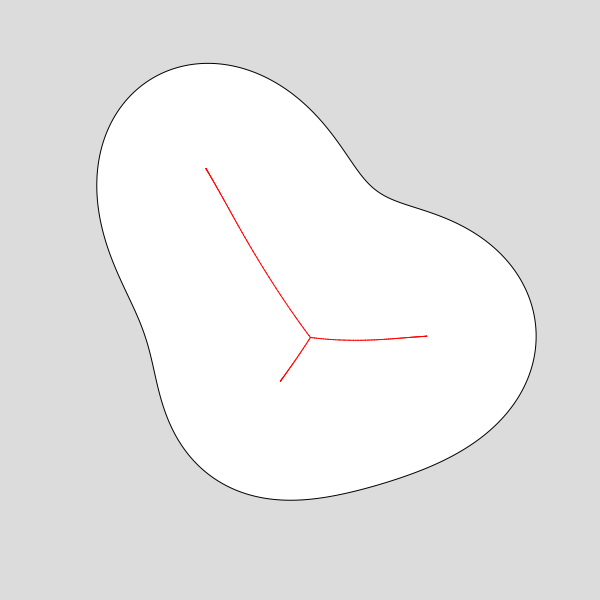

In [391]:
# Create canvas and draw
create_canvas(600, 600)
background(220)
translate(width//2, height//2)
stroke(1)
# no_fill()

# Draw boundary shape
begin_shape()
for x, y in points:
    vertex(x, y)
end_shape(CLOSE)

# Draw medial axis edges
stroke_weight(1)
stroke(255, 0, 0)
for a, b in edges:
    line(a[0], a[1], b[0], b[1])

show()

In [392]:
def medial_axis_points(vor, polygon, min_boundary_dist=8):
    medial = []

    for (i, j), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        if v1 == -1 or v2 == -1:
            continue

        for v in (v1, v2):
            p = vor.vertices[v]

            if not polygon.contains(Point(p)):
                continue

            boundary_dist = np.linalg.norm(
                vor.points[i] - vor.points[j]
            )

            if boundary_dist > min_boundary_dist:
                medial.append({
                    "center": p,
                    "b1": vor.points[i],
                    "b2": vor.points[j]
                })

    return medial

medial = medial_axis_points(vor, poly, min_boundary_dist=8)

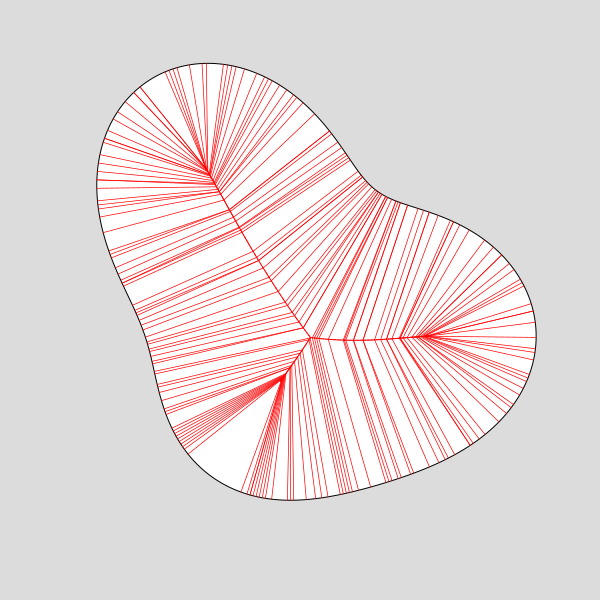

In [393]:
MIN_DIST = 24
last = None

stroke_weight(0.7)

for m in medial:
    c = m["center"]

    if last is not None:
        if np.linalg.norm(c - last) < MIN_DIST:
            continue

    b1 = m["b1"]
    b2 = m["b2"]

    line(c[0], c[1], b1[0], b1[1])
    line(c[0], c[1], b2[0], b2[1])

    last = c

show()

### Converting coordinates of discharge points

Data from Thames Water will be converted in the canvas to draw the points where it will be drawing shapes.

x: 4, y: 321
x: 198, y: 587
x: 522, y: 257
x: 56, y: 289
x: 48, y: 337


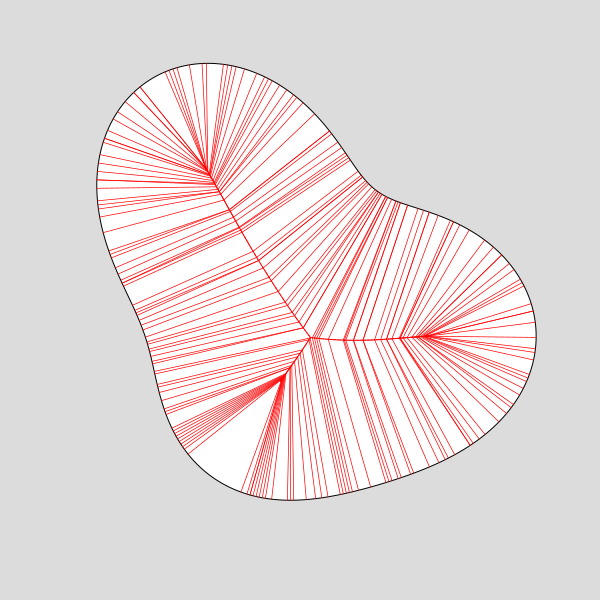

In [394]:
minX = 402500
maxX = 559170
minY = 132300
maxY = 252560

# Test with an example value: Cirencester 
coords = [
    (403580, 196790),  # Cirencester
    (454370, 250100),  # Eydon
    (539050, 183880),  # West Ham Lane CSO
    (417380, 190420),  # Stanton Fitzwarren STW
    (415170, 199920)   # Fairford
]

exampleX = 403580 
exampleY = 196790 

def map_value(val, rangeMin, rangeMax, screenMin=0, screenMax=600):
    # Clamp input values
    cv = max(rangeMin, min(val, rangeMax))

    # Normalise to 0–1
    nv = (cv - rangeMin) / (rangeMax - rangeMin)
    # print("between 0-1: " + str(nv))

    # # Flip Y for screen coordinates (origin at top-left)
    # ny = 1.0 - ny

    # Map to screen range
    mapped_val = screenMin + nv * (screenMax - screenMin)

    return mapped_val

# Test mapping function
for x, y in coords:
    mx = int(map_value(x, minX, maxX))
    my = int(map_value(y, minY, maxY))
    print("x: " + str(mx) + ", y: " + str(my))

show()


### Getting data from Thames Water

## Reflection and Future Development

Reflect on how the project went, what went well, what you learnt etc. Based on these reflections, conclude with how you would further develop this project if you were to make another version or how you would further develop your ideas.


## References 

Use the citation method recommended by your lecturer or that is standard in a field you are interested in. At the very least include both conceptual and technical references. If you have used anyone else’s code even if you have adapted it, you must cite it here or risk being penalized or disqualified for plagiarism! Make sure you cite your references in the text!

- ScienceDirect (2025) _Medial Axis._ Available at: https://www.sciencedirect.com/topics/mathematics/medial-axis [accessed 23 December 2026].
